In [15]:
import cv2
import imutils
import numpy as np
import time
from matplotlib import pyplot as plt
from keras.models import load_model
import PIL

# Reference: https://www.pyimagesearch.com/2015/09/14/ball-tracking-with-opencv/

In [2]:
def showImg(image, title="Picture"):
#     gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    plt.imshow(image)
    plt.title(title)
    plt.show()

In [3]:
samplePath = "/Users/patrickbell/Documents/sodukuAI/puzzleDetector/sample2.png"
img = cv2.imread(samplePath)

# showImg(img)

In [4]:
# AUTOMATICALLY FIND COLOR

blackLower = (0,0,0)
blackUpper = (200,200,200)

threshhold = 0.4

for i in range(img.shape[0]):
    color = img[i][i]
    if color[0] < 200 and color[1] < 200 and color[2] < 200:
        blackLower = (color[0]-color[0]*threshhold,color[1]-color[1]*threshhold,color[2]-color[2]*threshhold)
        blackUpper = (color[0]+color[0]*threshhold,color[1]+color[1]*threshhold,color[2]+color[2]*threshhold)
        break
        
print(blackLower,blackUpper)

(48.0, 48.0, 48.0) (112.0, 112.0, 112.0)


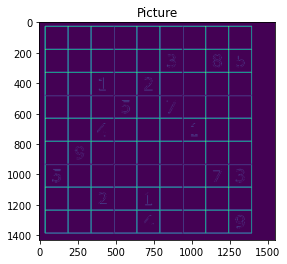

In [5]:
# Filtering by color

mask = cv2.inRange(img, blackLower, blackUpper)
showImg(mask)

[[  38 1385]
 [  38   26]
 [1397   26]
 [1397 1385]]


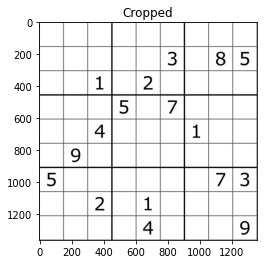

In [6]:
# Get contours

cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnts = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
cnt = max(cnts, key=cv2.contourArea)

# Get rectangle of masked image
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
print(box)

# Assign coordinates of rectangle
topLeftCornerX = box[1][0]
topLeftCornerY = box[1][1]
bottomRightCornerX = box[3][0]
bottomRightCornerY = box[3][1]

# The image of just the grid
croppedImg = img[topLeftCornerY:bottomRightCornerY, topLeftCornerX:bottomRightCornerX]
showImg(croppedImg, "Cropped")

In [7]:
# Get 9 sub grids

subGrids = [
    [[],[],[]],
    [[],[],[]],
    [[],[],[]]
]

height, width, colorChannels = croppedImg.shape

# grid1 = img[y:ymax, x:xmax]
# grid1 = croppedImg[0:int(height/3), 0:int(width/3)]

# Loops through each grid size and adds the grid to the grids array
xInc = int(height/3)
yInc = int(width/3)
for i in range(3):
    for j in range(3):
        subGrids[i][j] = croppedImg[yInc*i:yInc*i+yInc, xInc*j:xInc*j+xInc]

# grid = subGrids[1][2]
# showImg(grid)

In [8]:
# Create cells

# Ex cells[subGridRow][subGridColumn][row][column]
cells = []

for subGridRow in range(3):
    cells.append([])
    for subGridColumn in range(3):
        cells[subGridRow].append([])
        for row in range(3):
            cells[subGridRow][subGridColumn].append([])
            for column in range(3):
                cells[subGridRow][subGridColumn][row].append(None)
                
                
for subGridRow in range(3):
    for subGridColumn in range(3):
        subGridImg = subGrids[subGridRow][subGridColumn]
        subGridImgHeight, subGridImgWidth, subGridImgColorChannels = subGridImg.shape
        xInc = int(subGridImgHeight/3)
        yInc = int(subGridImgWidth/3)
        for i in range(3):
            for j in range(3):
                cells[subGridRow][subGridColumn][i][j] = subGridImg[yInc*i:yInc*i+yInc, xInc*j:xInc*j+xInc]



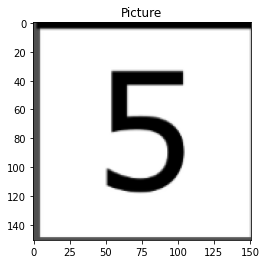

In [35]:
cell = cells[2][0][0][0]
showImg(cell)



In [64]:
# TODO: Create a huge dataset of images to train

# For font in allFonts:
#     for number in numbers:
#         for (offset number x and y by some)
#             numWithNoBorder
#             numWithTopBorder
#             numWithLeftBorder
#             numWithRightBorder
#             numWithBottomBorder
#             ..... prob 16 dif ones (4*4) or 64? 4^4

# if 100 fonts, 10 digits (blank instead of 0), 5 different offsets, 16 border combinations == 80,000 pictures


In [21]:
model = load_model("/Users/patrickbell/Documents/sodukuAI/digitClassifier/Handwritten digit recognizer/mnist.h5")

In [45]:
cell = cells[2][0][0][0]
resizedCell = cv2.resize(cell, (28,28), interpolation = cv2.INTER_AREA)

# showImg(resizedCell)
# model.predict([resizedCell])
img = PIL.Image.fromarray(resizedCell)
# img.show()
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert('L')
img = np.array(img)
#reshaping to support our model input and normalizing
img = img.reshape(1,28,28,1)
img = img/255.0
#predicting the class
res = list(model.predict([img])[0])
print(res)
print(res.index(max(res)), max(res))


[0.14207266, 0.058864992, 0.085837334, 0.12610567, 0.10116739, 0.103065595, 0.081469245, 0.09928707, 0.11794915, 0.08418095]
0 0.14207266


In [27]:
l = [5,6,7]

l.index(5)

0